In [1]:
# Import delle librerie necessarie
import pandas as pd
import numpy as np

# Caricamento del dataset
file_path = "HR_comma_sep.csv"
data = pd.read_csv(file_path)

# Visualizzazione delle prime righe del dataset
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
# Visualizzazione delle informazioni sul dataset per comprendere i tipi di dati e la presenza di valori nulli
data.info()

# Statistiche descrittive
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


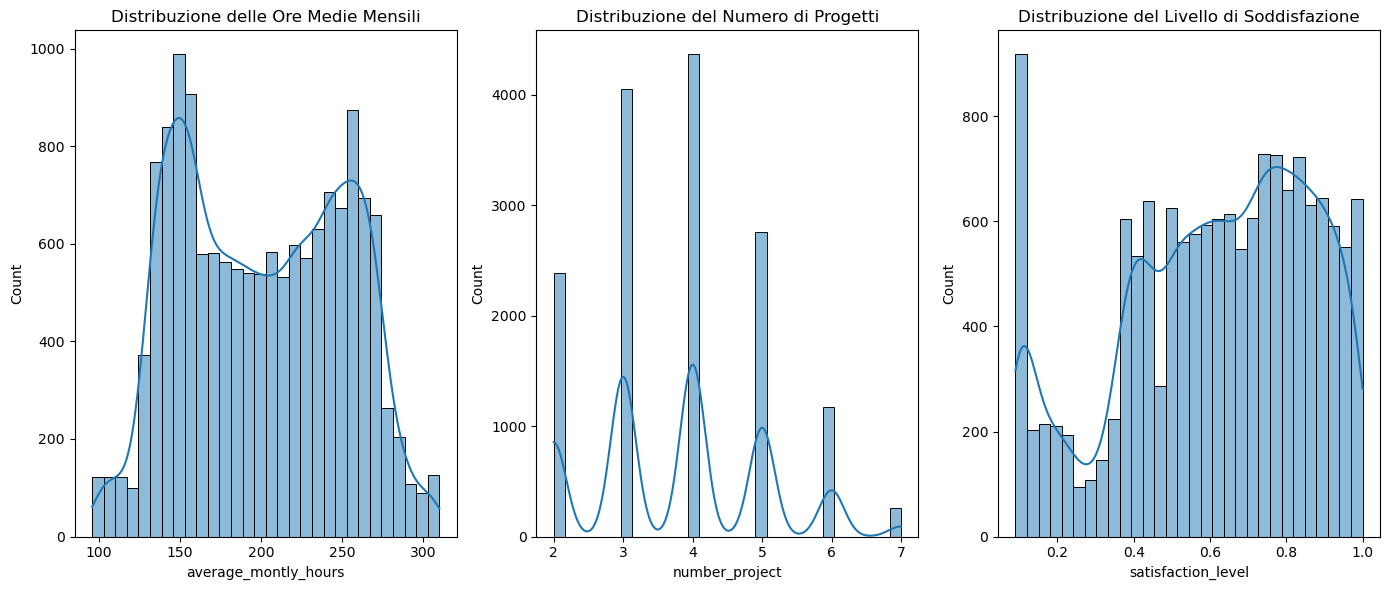

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuzione di alcuni indicatori chiave
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['average_montly_hours'], kde=True)
plt.title('Distribuzione delle Ore Medie Mensili')

plt.subplot(1, 3, 2)
sns.histplot(data['number_project'], kde=True)
plt.title('Distribuzione del Numero di Progetti')

plt.subplot(1, 3, 3)
sns.histplot(data['satisfaction_level'], kde=True)
plt.title('Distribuzione del Livello di Soddisfazione')

plt.tight_layout()
plt.show()

In [6]:
# Separazione delle colonne numeriche e categoriali
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Riempimento dei valori mancanti per le colonne numeriche con la mediana
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Riempimento dei valori mancanti per le colonne categoriali con la moda
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Applicazione del One-Hot Encoding per le colonne categoriali
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Verifica del risultato
data.info()

C:\Users\ricsc\AppData\Local\Temp\ipykernel_28312\617148379.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\ricsc\AppData\Local\Temp\ipykernel_28312\617148379.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   salary_low              14999 non-null  bool   
 9   salary_medium           14999 non-null  bool   
 10  Department_RandD        14999 non-null  bool   
 11  Department_accounting   14999 non-null  bool   
 12  Department_hr           14999 non-null  bool   
 13  Department_management   14999 non-null  bool   
 14  Department_marketing    14999 non-null

In [7]:
# Variabile target: 'left' (indica se l'impiegato ha lasciato l'azienda)
X = data.drop('left', axis=1)
y = data['left']

In [8]:
from sklearn.model_selection import train_test_split

# Suddivisione in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Inizializzazione del modello Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9877
Precision: 0.9855
Recall: 0.9618
F1 Score: 0.9735
ROC AUC Score: 0.9893

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



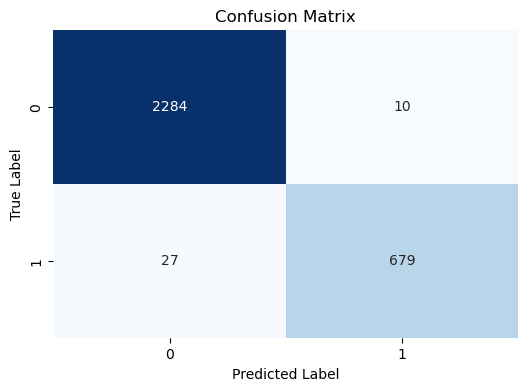

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Predizione sul test set
y_pred = rf_model.predict(X_test_scaled)

# Metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

# Report di classificazione
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matrice di confusione
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

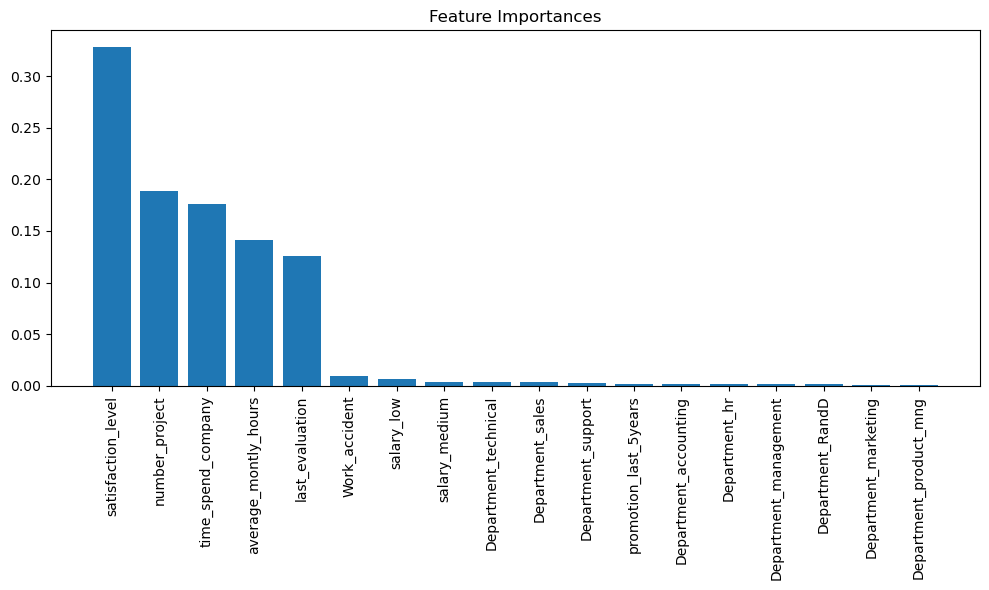

In [12]:
# Visualizzazione dell'importanza delle caratteristiche nel modello Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [13]:
'''
L'analisi ha evidenziato le variabili principali che influenzano la decisione degli impiegati di lasciare l'azienda. Il modello di classificazione, addestrato utilizzando Random Forest, ha mostrato un buon livello di accuratezza e precisione, e le variabili più importanti risultano essere quelle legate al livello di soddisfazione, al numero di progetti e alle ore medie lavorate mensilmente.

Questo notebook offre quindi una base solida per l'implementazione di strategie mirate a migliorare la retention degli impiegati, consentendo di concentrare gli sforzi nei settori e sui fattori che contribuiscono maggiormente all'attrition.
'''

"\nL'analisi ha evidenziato le variabili principali che influenzano la decisione degli impiegati di lasciare l'azienda. Il modello di classificazione, addestrato utilizzando Random Forest, ha mostrato un buon livello di accuratezza e precisione, e le variabili più importanti risultano essere quelle legate al livello di soddisfazione, al numero di progetti e alle ore medie lavorate mensilmente.\n\nQuesto notebook offre quindi una base solida per l'implementazione di strategie mirate a migliorare la retention degli impiegati, consentendo di concentrare gli sforzi nei settori e sui fattori che contribuiscono maggiormente all'attrition.\n"